Test cài các thư viện cần thiết

In [11]:
from sklearn import tree
X = [[0,0], [2,2]]
y = [0.5, 2.5]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1,1]])

array([0.5])

1.1


    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman



C:\Users\Admin\AppData\Local\Temp\ipykernel_3772\3905014015.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\AppData\Local\Temp\ipykernel_3772\3905014015.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\AppData\Local\Temp\ipykernel_3772\3905014015.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\AppData\Local\Temp\ipykernel_3772\3905014015.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\AppData\Local\Temp\ipykernel_3772\3905014015.py:57: UserWarning: 

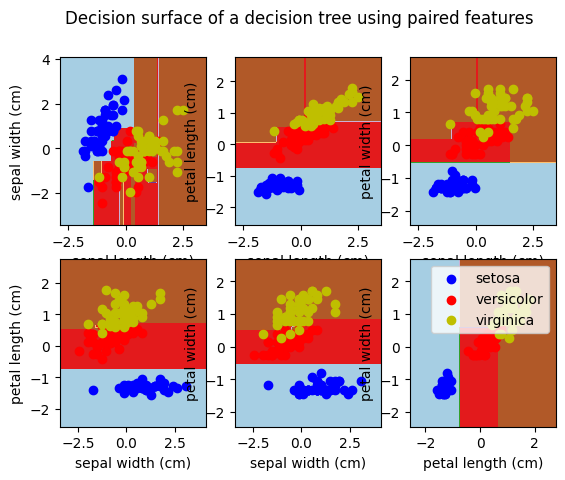

In [12]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


1.2 và 1.3

In [13]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score

numFold = 10

def k_fold_split(X, y, num_fold):
    n = len(X)
    fold_size = n // num_fold
    remainder = n % num_fold

    indices = list(range(n))

    folds = []

    for fold in range(num_fold):
        # Tính kích thước của fold
        fold_end = fold * fold_size + min(fold, remainder) + fold_size

        # Chia dữ liệu thành fold kiểm tra và dữ liệu huấn luyện
        test_indices = indices[fold * fold_size:min(fold_end, n)]
        train_indices = indices[:fold * fold_size] + indices[fold_end:n]

        X_train = [X[i] for i in train_indices]
        y_train = [y[i] for i in train_indices]

        X_test = [X[i] for i in test_indices]
        y_test = [y[i] for i in test_indices]


    return X_train, y_train, X_test, y_test

def evaluatePerformance(numTrials=100):
  
    # Load Data
    filename = r"data\SPECTF.dat"
    data = np.loadtxt(filename, delimiter=',') # Data: mảng 267 hàng 45 cột 
    X = data[:, 1:] # Tất cả hàng cột trừ cột đầu tiên => mảng 267 hàng 44 cột
    y = np.array([data[:, 0]]).T # Cột đầu tiên transpose => mảng 1 cột chứa label
    n,d = X.shape

    # create list to hold data
    treeAccuracies = []
    stumpAccuracies = []
    dt3Accuracies = []

    # perform 100 trials
    for x in range(0, numTrials):
        print(x)
        # shuffle the data
        idx = np.arange(n) # Khoi tao mang idx so nguyen co gia tri tu 1 toi idx
        np.random.seed(13) # Khoi tao mang ngau nhien
        np.random.shuffle(idx) # Trộn lại mảng idx, các phần tử nằm vị trí ngẫu nhiên
        X = X[idx] # Phương thức ngẫu nhiên hóa các phần tử của mảng X dựa vào vị trí chỉ số mảng idx cung cấp
        y = y[idx] # Tương tự trên

        Xtrain,ytrain,Xtest,ytest = k_fold_split(X,y, numFold)
        
        # Train decision tree
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(Xtrain,ytrain)
        # output predictions on the remaining data
        y_pred_tree = clf.predict(Xtest)

        # train the 1-level decision tree
        oneLevel = tree.DecisionTreeClassifier(max_depth=1)
        oneLevel = oneLevel.fit(Xtrain,ytrain)
        # output predictions on the remaining data
        y_pred_stump = oneLevel.predict(Xtest)

        # train the 3-level decision tree
        threeLevel = tree.DecisionTreeClassifier(max_depth=3)
        threeLevel = threeLevel.fit(Xtrain,ytrain)
        # output predictions on the remaining data
        y_pred_dt3 = threeLevel.predict(Xtest)

        # Tính toán training accuracy của model và save vào list chứa tất cả độ chính xác
        treeAccuracies.append(accuracy_score(ytest, y_pred_tree))
        stumpAccuracies.append(accuracy_score(ytest, y_pred_stump))
        dt3Accuracies.append(accuracy_score(ytest, y_pred_dt3))
        #Hàm accuracy_score: In multilabel classification, this function computes subset accuracy:
        # the set of labels predicted for a sample must *exactly* match the
        # corresponding set of labels in y_true. 
    
    # Tính toán mean và std của các accuracy thu được
    meanDecisionTreeAccuracy = np.mean(treeAccuracies)
    stddevDecisionTreeAccuracy = np.std(treeAccuracies)
    meanDecisionStumpAccuracy = np.mean(stumpAccuracies)
    stddevDecisionStumpAccuracy = np.std(stumpAccuracies)
    meanDT3Accuracy = np.mean(dt3Accuracies)
    stddevDT3Accuracy = np.std(dt3Accuracies)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    return stats



# Do not modify from HERE...
if __name__ == "__main__":
    
    stats = evaluatePerformance()
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Decision Tree Accuracy =  0.7324242424242425  ( 0.06528246178220665 )
Decision Stump Accuracy =  0.8018181818181818  ( 0.07176382036710614 )
3-level Decision Tree =  0.7596969696969695  ( 0.06683930814234734 )


1.4

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


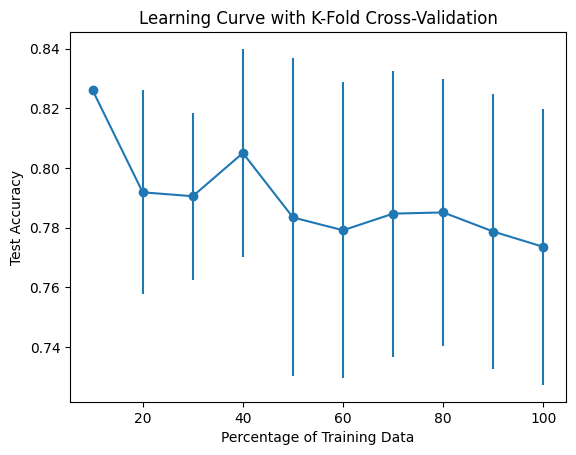

Decision Tree Accuracy =  0.7324242424242425  ( 0.06528246178220665 )
Decision Stump Accuracy =  0.8018181818181818  ( 0.07176382036710614 )
3-level Decision Tree =  0.7596969696969695  ( 0.06683930814234734 )


In [14]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score

numFold = 10

def k_fold_split(X, y, num_fold):
    n = len(X)
    fold_size = n // num_fold
    remainder = n % num_fold

    indices = list(range(n))

    folds = []

    for fold in range(num_fold):
        # Tính kích thước của fold
        fold_end = fold * fold_size + min(fold, remainder) + fold_size

        # Chia dữ liệu thành fold kiểm tra và dữ liệu huấn luyện
        test_indices = indices[fold * fold_size:min(fold_end, n)]
        train_indices = indices[:fold * fold_size] + indices[fold_end:n]

        X_train = [X[i] for i in train_indices]
        y_train = [y[i] for i in train_indices]

        X_test = [X[i] for i in test_indices]
        y_test = [y[i] for i in test_indices]


    return X_train, y_train, X_test, y_test

    

def evaluatePerformance(numTrials=100):

    # Load Data
    filename = r"data\SPECTF.dat"
    data = np.loadtxt(filename, delimiter=',') # Data: mảng 267 hàng 45 cột 
    X = data[:, 1:] # Tất cả hàng cột trừ cột đầu tiên => mảng 267 hàng 44 cột
    y = np.array([data[:, 0]]).T # Cột đầu tiên transpose => mảng 1 cột chứa label
    n,d = X.shape

    # create list to hold data
    treeAccuracies = []
    stumpAccuracies = []
    dt3Accuracies = []

    # perform 100 trials
    for x in range(0, numTrials):
        print(x)
        # shuffle the data
        idx = np.arange(n) # Khoi tao mang idx so nguyen co gia tri tu 1 toi idx
        np.random.seed(13) # Khoi tao mang ngau nhien
        np.random.shuffle(idx) # Trộn lại mảng idx, các phần tử nằm vị trí ngẫu nhiên
        X = X[idx] # Phương thức ngẫu nhiên hóa các phần tử của mảng X dựa vào vị trí chỉ số mảng idx cung cấp
        y = y[idx] # Tương tự trên

        Xtrain,ytrain,Xtest,ytest = k_fold_split(X,y, numFold)
        
        # Train decision tree
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(Xtrain,ytrain)
        # output predictions on the remaining data
        y_pred_tree = clf.predict(Xtest)

        # train the 1-level decision tree
        oneLevel = tree.DecisionTreeClassifier(max_depth=1)
        oneLevel = oneLevel.fit(Xtrain,ytrain)
        # output predictions on the remaining data
        y_pred_stump = oneLevel.predict(Xtest)

        # train the 3-level decision tree
        threeLevel = tree.DecisionTreeClassifier(max_depth=3)
        threeLevel = threeLevel.fit(Xtrain,ytrain)
        # output predictions on the remaining data
        y_pred_dt3 = threeLevel.predict(Xtest)

        # Tính toán training accuracy của model và save vào list chứa tất cả độ chính xác
        treeAccuracies.append(accuracy_score(ytest, y_pred_tree))
        stumpAccuracies.append(accuracy_score(ytest, y_pred_stump))
        dt3Accuracies.append(accuracy_score(ytest, y_pred_dt3))

        percentage_values = range(10, 101, 10)
        mean_accuracy = []
        std_accuracy = []
        treeacc_new = []
        
        for percentage in percentage_values:
            # Calculate the number of samples to use for the given percentage
            num_samples = int(len(Xtrain) * percentage / 100)
            
            Xtrain_new = Xtrain[:num_samples ]
            ytrain_new = ytrain[:num_samples]
            Xtest_new = Xtest[:num_samples]
            ytest_new = ytest[:num_samples]
            # Train decision tree
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(Xtrain_new,ytrain_new)
            # output predictions on the remaining data
            y_pred_new = clf.predict(Xtest_new)
            treeacc_new.append(accuracy_score(ytest_new, y_pred_new))
            # Calculate mean and std of test accuracy
            mean_accuracy.append(np.mean(treeacc_new))
            std_accuracy.append(np.std(treeacc_new))
    plt.errorbar(percentage_values, mean_accuracy, yerr=std_accuracy, fmt='-o')
    plt.xlabel('Percentage of Training Data')
    plt.ylabel('Test Accuracy')
    plt.title('Learning Curve with K-Fold Cross-Validation')
    plt.show()
    # Tính toán mean và std của các accuracy thu được
    meanDecisionTreeAccuracy = np.mean(treeAccuracies)
    stddevDecisionTreeAccuracy = np.std(treeAccuracies)
    meanDecisionStumpAccuracy = np.mean(stumpAccuracies)
    stddevDecisionStumpAccuracy = np.std(stumpAccuracies)
    meanDT3Accuracy = np.mean(dt3Accuracies)
    stddevDT3Accuracy = np.std(dt3Accuracies)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    


    return stats



# Do not modify from HERE...
if __name__ == "__main__":
    
    stats = evaluatePerformance()
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")

# ...to HERE.